# OptiGuide Example




Here we give a simple example, as designed and illustrated in the [OptiGuide paper](https://arxiv.org/abs/2307.03875).
While the original paper is designed specifically for supply chain optimization, the general framework can be easily adapted to other applications with coding capacity.




## OptiGuide for Supply Chain Optimization: System Design Overview

The original system design for OptiGuide, tailored for supply chain optimization, is presented below.

The collaboration among three agents -- Coder, Safeguard, and Interpreter -- lies at the core of this system. They leverage a set of external tools and a large language model (LLM) to address users' questions related to supply chain applications. For a comprehensive understanding of the design and data flow, detailed information can be found in the original [paper](https://arxiv.org/abs/2307.03875).


![optiguide system](https://www.beibinli.com/docs/optiguide/optiguide_system.png)


## New Implementation



![](new_design.png)

Advantages of this multi-agent design with autogen:
- Collaborative Problem Solving: The collaboration among the user proxy agent and the assistant agents fosters a cooperative problem-solving environment. The agents can share information and knowledge, allowing them to complement each other's abilities and collectively arrive at better solutions. On the other hand, the Safeguard acts as a virtual adversarial checker, which can perform another safety check pass on the generated code.

- Modularity: The division of tasks into separate agents promotes modularity in the system. Each agent can be developed, tested, and maintained independently, simplifying the overall development process and facilitating code management.

- Memory Management: The OptiGuide agent's role in maintaining memory related to user interactions is crucial. The memory retention allows the agents to have context about a user's prior questions, making the decision-making process more informed and context-aware.



In [ ]:
%pip install openai==0.28.1
%pip install FLAML==2.1.1
%pip install gurobi-machinelearning==1.3.3
%pip install gurobipy==10.0.0
%pip install gurobipy-pandas==1.0.0
%pip install autogen==1.0.16

In [18]:
# test Gurobi installation
# %pip install autogen
import gurobipy as gp
from gurobipy import GRB
from eventlet.timeout import Timeout

# import auxillary packages
import requests  # for loading the example source code
import openai


from flaml.autogen.agentchat import Agent, UserProxyAgent
from flaml.autogen.agentchat import AssistantAgent
from flaml.autogen.agentchat.agent import Agent
from flaml.autogen.code_utils import extract_code
from flaml import autogen 
import os
from optiguide.optiguide import OptiGuideAgent

In [19]:
#autogen.oai.ChatCompletion.start_logging()

config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST.json",
    file_location=".",
    filter_dict={
        "model": {
            "gpt-4",
#             "gpt4",
            #"gpt-4-32k",
            #"gpt-4-32k-0314",
            #"gpt-3.5-turbo"
#             "gpt-3.5-turbo-16k"
            #"gpt-3.5-turbo-0301",
            #"chatgpt-35-turbo-0301",
            #"gpt-35-turbo-v0301",
        }
    }
)
#config_list = []

Now, let's import the source code (loading from URL) and also some training examples (defined as string blow).

In [20]:
code_type = 'py_file' #options: demo, py_file, notebook

# -----------------  ----------------- ----------------- -----------------


if code_type == 'demo':
    # Get the source code of our coffee example
    code_url = "https://raw.githubusercontent.com/microsoft/OptiGuide/main/benchmark/application/coffee.py"
    response  = requests.get(code_url)


    # Check if the request was successful
    if response.status_code == 200:
        # Get the text content from the response
        code = response.text
    else:
        raise RuntimeError("Failed to retrieve the file.")
elif code_type == 'py_file':
    
    code = open('web_scrape_price_data.py', 'r').read()
    code += '\n'
    code += open('run_model.py', 'r').read()
    code += '\n'
    code += open( 'two_stage.py', "r").read()
elif code_type == 'notebook':
    # Extract code from jupyter notebook
    import nbformat
    def extract_code_from_notebook(notebook_path):
        try:
            with open(notebook_path, 'r', encoding='utf-8') as notebook_file:
                notebook_content = nbformat.read(notebook_file, as_version=4)

            code_cells = []
            for cell in notebook_content['cells']:
                if cell['cell_type'] == 'code':
                    code_cells.append(cell['source'])

            code_as_string = '\n'.join(code_cells)
            return code_as_string
        except FileNotFoundError:
            print(f"Error: Notebook file '{notebook_path}' not found.")
            return None
        except Exception as e:
            print(f"Error reading notebook: {e}")
            return None

    # Example usage
    notebook_path = 'Battery_Optimization_Shen_Lapp_Poser.ipynb'
    code = extract_code_from_notebook(notebook_path)


# show the first head and tail of the source code
print("\n".join(code.split("\n")))
print(".\n" * 3)
print("\n".join(code.split("\n")))


import os
import re
import sys
import time
import shutil
import zipfile
import requests
import numpy as np
import pandas as pd
import gurobipy as gp
from selenium import webdriver
from datetime import datetime, timedelta
from webdriver_manager.chrome import ChromeDriverManager

columns = ['Time Stamp', 'LBMP ($/MWHr)', 'Marginal Cost Losses ($/MWHr)', 'Marginal Cost Congestion ($/MWHr)']
new_columns = {
    'Time Stamp': 'time',
    'LBMP ($/MWHr)': 'LB_MargPrice',
    'Marginal Cost Losses ($/MWHr)': 'MargCostLosses',
    'Marginal Cost Congestion ($/MWHr)': 'MargCostCongestion'
}

#if download_directory is None:
home_dir = os.path.expanduser("~")
home_dir = os.getcwd()
download_directory = os.path.join(home_dir, 'Downloads_CSV')
storage_directory = os.path.join(home_dir, 'Data') 

print("storage_directory: ", storage_directory)
print("download_directory: ", download_directory)
print("home_dir: ", home_dir)


def extract_date(file_path):
    match = re.match(r'^(\d+)', file_path.split

In [6]:
print("\n".join(code.split("\n")))
print(".\n" * 3)
print("\n".join(code.split("\n")))

import os
import re
import sys
import time
import shutil
import zipfile
import requests
import numpy as np
import pandas as pd
import gurobipy as gp
from selenium import webdriver
from datetime import datetime, timedelta
from webdriver_manager.chrome import ChromeDriverManager

columns = ['Time Stamp', 'LBMP ($/MWHr)', 'Marginal Cost Losses ($/MWHr)', 'Marginal Cost Congestion ($/MWHr)']
new_columns = {
    'Time Stamp': 'time',
    'LBMP ($/MWHr)': 'LB_MargPrice',
    'Marginal Cost Losses ($/MWHr)': 'MargCostLosses',
    'Marginal Cost Congestion ($/MWHr)': 'MargCostCongestion'
}

#if download_directory is None:
home_dir = os.path.expanduser("~")
home_dir = os.getcwd()
download_directory = os.path.join(home_dir, 'Downloads_CSV')
storage_directory = os.path.join(home_dir, 'Data') 

print("storage_directory: ", storage_directory)
print("download_directory: ", download_directory)
print("home_dir: ", home_dir)


def extract_date(file_path):
    match = re.match(r'^(\d+)', file_path.split

In [7]:
code.find('os.getcwd()')

668

In [8]:
os.getcwd()

'/Users/ryanshen/Desktop/Code'

storage_directory:  /Users/ryanshen/Desktop/Code/Data
download_directory:  /Users/ryanshen/Desktop/Code/Downloads_CSV
home_dir:  /Users/ryanshen/Desktop/Code
storage_directory:  /Users/ryanshen/Desktop/Code/Data
download_directory:  /Users/ryanshen/Desktop/Code/Downloads_CSV
home_dir:  /Users/ryanshen/Desktop/Code


----------------------------------------------------------------------
...Price data already downloaded for date: 20231007, Generator: ADK HUDSON___FALLS
...Price data already downloaded for date: 20231008, Generator: ADK HUDSON___FALLS
...Price data already downloaded for date: 20231009, Generator: ADK HUDSON___FALLS
...Price data already downloaded for date: 20231010, Generator: ADK HUDSON___FALLS
...Price data already downloaded for date: 20231011, Generator: ADK HUDSON___FALLS
...Price data already downloaded for date: 20231012, Generator: ADK HUDSON___FALLS
...Price data already downloaded for date: 20231013, Generator: ADK HUDSON___FALLS
...Price data already download


Solved in 4 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.473269412e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231109, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xb71f9abc
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+01, 6e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.4403

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x1db8f8de
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.4242107e+05   4.078736e+04   0.000000e+00      0s
       3    8.9236824e+03   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.00 seconds (0.00 work units)
Optimal objective  8.923682353e+03


----------------------------------------------------------------------
...Price data alread

Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x756c6558
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0745752e+06   4.078736e+04   0.000000e+00      0s
       6    1.2320576e+04   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.232057647e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231124, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using 

Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5351613e+06   4.078736e+04   0.000000e+00      0s
       5    2.0218388e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.021838824e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231201, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xcdd0026a
Coefficient statistics:
  Matrix range     [3e-01,

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (745,) and arg 1 with shape (0,).

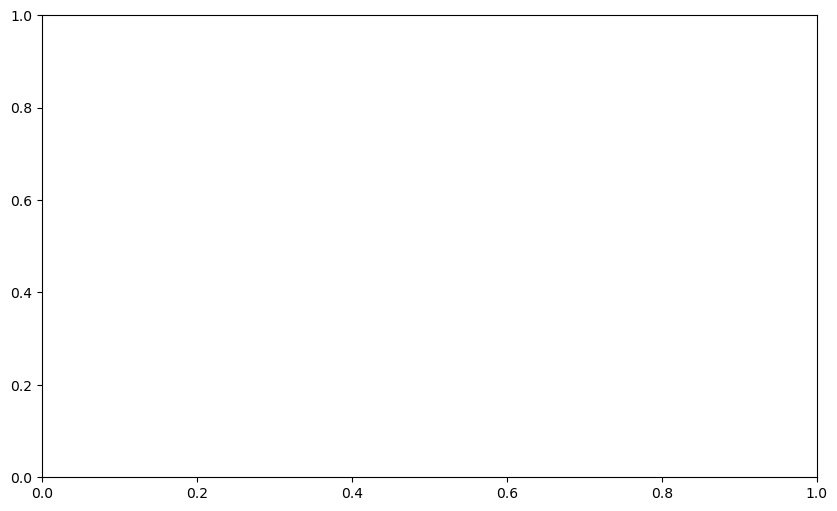

In [10]:
#Pass in paths
home_dir = os.path.expanduser("~")
home_dir = os.getcwd()
download_directory = os.path.join(home_dir, 'Downloads_CSV')
storage_directory = os.path.join(home_dir, 'Data') 

exec(code, {'download_directory': download_directory, 
    'storage_directory': storage_directory, 
    'home_dir':home_dir})

#exec(code)

In [31]:
# In-context learning examples.
example_qa = """
"
Question: What if we switch our generator from ADK HUDSON___FALLS to CORNELL__?
Answer Code:
```python
parameters['generator_name'] = 'CORNELL__'
----------
Question: What if all warehouse costs are 15% more expensive?"
Answer Code:
```python
for w in range(len(parameters['warehouse_data'])):
    parameters['warehouse_data'][w]['cost'] *= 1.15
```
----------

Question: "What if every 14 periods, we can't sell electricity to the grid?"
Answer Code:
```python
break_num = 14
for p in range(num_periods):
    if p%break_num == 0:
        model.addConstr(sell[p] = 0, f'DischargeConstraint_period_{p+1}')
```
----------
Question: "What if our warehouses needed to install an additional 20 square feet for cooling towers?"
Answer Code:
```python
dec = 20
for p in range(num_periods):
    for w in len(parameters['warehouses']):
        parameters['warehouse_data'][w]['area'] -= dec
```
----------

Question: What if the battery charge capacity for Lithium was only 70 percent instead of 95 percent?
Answer Code:
```python
charge_pct = 70
parameters['lithium']['charge_loss'] = charge_pct/100
```
----------

Question: What if our procurment team told us we had to have a minimum of 30 batteries and a maximum of 70 batteries?
Answer Code:
```python
model.addConstraint(decision_var_dict['battery_counts'] >= 30, f'MinBatteriesConstraint') 
model.addConstraint(decision_var_dict['battery_counts'] <= 70, f'MaxBatteriesConstraint')
 ```
----------

Question: What if we had a minimum charge of 20% at all periods?
Answer Code:
```python
for p in range num_periods:
    model.addConstr(charge_loss * buy[p_] - sell[p] for p_ in range(p+1) >= 0.2*capacity, f'MinChargeConstraint')

```
----------
Question: What if you added a vanadium flow battery and knew the specs as follows:
size = 18
capacity = 270
charge loss = 30%
max charge = 1000
max_discharge = 10
cost = 800
Answer Code:
```python
parameters['battery_type']['vanadium'] = {
'size': 18,
'capacity': 270,
'charge_loss': 0.3,
'max_charge': 1000,
'max_discharge': 10,
'cost': 800
}
parameters['battery_types_used'].append('vanadium')

```
----------
Question: What if we were looking to maximize our profits exclusively in the last 14 days of the month? 
Answer Code:
```python
model.setObjective(
        gp.quicksum(prices[p] * sell[p, i] - prices[p] * buy[p, i] for p in periods for i in markets if p >= periods - 14),
        GRB.MAXIMIZE
    )
```
----------
Question: What if we were to add an additional 2 square square feet of space for every battery type to install a fan? 
Answer Code:
```python
for battery in parameters['battery_type']:
        parameters['battery_type'][battery]['size'] += 2

```
----------
Question: What if our procurment team told us we had to have a minimum of 20 but doing so would get us a bulk 
discount of 10%? 
Answer Code:
```python
discount = 10
parameters['battery_type']['cost'] *= (100-discount)/100
model.addConstraint(decision_var_dict['battery_counts'] >= 20, f'MinBatteriesConstraint') 
"""

In [32]:
code.find('# OPTIGUIDE DATA CODE GOES HERE')

12321

In [33]:
file_path = os.path.abspath(code)
print(file_path)

/Users/ryanshen/Desktop/Code/import os
import re
import sys
import time
import shutil
import zipfile
import requests
import numpy as np
import pandas as pd
import gurobipy as gp
from selenium import webdriver
from datetime import datetime, timedelta
from webdriver_manager.chrome import ChromeDriverManager

columns = ['Time Stamp', 'LBMP ($/MWHr)', 'Marginal Cost Losses ($/MWHr)', 'Marginal Cost Congestion ($/MWHr)']
new_columns = {
    'Time Stamp': 'time',
    'LBMP ($/MWHr)': 'LB_MargPrice',
    'Marginal Cost Losses ($/MWHr)': 'MargCostLosses',
    'Marginal Cost Congestion ($/MWHr)': 'MargCostCongestion'
}

#if download_directory is None:
home_dir = os.path.expanduser("~")
home_dir = os.getcwd()
download_directory = os.path.join(home_dir, 'Downloads_CSV')
storage_directory = os.path.join(home_dir, 'Data') 

print("storage_directory: ", storage_directory)
print("download_directory: ", download_directory)
print("home_dir: ", home_dir)


def extract_date(file_path):
    match = re.mat

In [34]:
file_path = os.path.abspath(code)
print(file_path)

/Users/ryanshen/Desktop/Code/import os
import re
import sys
import time
import shutil
import zipfile
import requests
import numpy as np
import pandas as pd
import gurobipy as gp
from selenium import webdriver
from datetime import datetime, timedelta
from webdriver_manager.chrome import ChromeDriverManager

columns = ['Time Stamp', 'LBMP ($/MWHr)', 'Marginal Cost Losses ($/MWHr)', 'Marginal Cost Congestion ($/MWHr)']
new_columns = {
    'Time Stamp': 'time',
    'LBMP ($/MWHr)': 'LB_MargPrice',
    'Marginal Cost Losses ($/MWHr)': 'MargCostLosses',
    'Marginal Cost Congestion ($/MWHr)': 'MargCostCongestion'
}

#if download_directory is None:
home_dir = os.path.expanduser("~")
home_dir = os.getcwd()
download_directory = os.path.join(home_dir, 'Downloads_CSV')
storage_directory = os.path.join(home_dir, 'Data') 

print("storage_directory: ", storage_directory)
print("download_directory: ", download_directory)
print("home_dir: ", home_dir)


def extract_date(file_path):
    match = re.mat

Now, let's create an OptiGuide agent and also a user.

For the OptiGuide agent, we only allow "debug_times" to be 1, which means it can debug its answer once if it encountered errors.

In [35]:
%%capture
agent = OptiGuideAgent(
    name="OptiGuide Energy Arbitrage Example",
    source_code=code,
    debug_times=1,
    example_qa=example_qa,
    llm_config={
        "request_timeout": 600,
        "seed": 42,
        "config_list": config_list,
    }
)

user = UserProxyAgent("user", max_consecutive_auto_reply=0, human_input_mode="NEVER", code_execution_config=False)

# Get open ai key from txt file
api_path = '../Credentials/openai_api_key.txt'

with open(api_path, "r") as file:
        api_key = file.read().strip()

openai.api_key = api_key

Now, let's create a user's question.

user (to OptiGuide Energy Arbitrage Example):

What if all warehouse costs were 13% more expensive

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to writer):


Answer Code:


--------------------------------------------------------------------------------
writer (to OptiGuide Energy Arbitrage Example):

```python
for w in range(len(parameters['warehouse_data'])):
    parameters['warehouse_data'][w]['cost'] *= 1.13
```

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to safeguard):


--- Code ---
for w in range(len(parameters['warehouse_data'])):
    parameters['warehouse_data'][w]['cost'] *= 1.13

--- One-Word Answer: SAFE or DANGER ---


--------------------------------------------------------------------------------
[flaml.autogen.oai.completion: 12-08 12:06:48] {236} INFO - retrying in 10 seconds...
Traceback (most recent call last):
  File "/Us

       6    2.8672741e+04   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.867274118e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231107, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x436df15f
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objec


CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x00f0bfdd
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1379652e+06   4.078736e+04   0.000000e+00      0s
       6    2.2589165e+04   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.258916471e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231115, Generator: ADK HUDSON___FALLS

Model fingerprint: 0x2393e877
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2076826e+06   4.078736e+04   0.000000e+00      0s
       4    1.5250365e+04   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.525036471e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231122, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercia

Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5474757e+06   4.078736e+04   0.000000e+00      0s
       5    4.4202890e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  4.420289037e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231129, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xc4f26d37
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [4e+01, 1e+02]
  Bounds range     [

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.129070588e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231206, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x157b4994
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.68526

[flaml.autogen.oai.completion: 12-08 12:07:47] {236} INFO - retrying in 10 seconds...
Traceback (most recent call last):
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/flaml/autogen/oai/completion.py", line 206, in _get_response
    response = openai_completion.create(**config)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/chat_completion.py", line 25, in create
    return super().create(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/abstract/engine_api_resource.py", line 155, in create
    response, _, api_key = requestor.request(
                           ^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_requestor.py", line 299, in request
    resp, got_stream = self._interpret_response(result, s

  Objective range  [2e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.2324717e+05   4.078736e+04   0.000000e+00      0s
       6    9.2158706e+03   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  9.215870588e+03


----------------------------------------------------------------------
...Price data already downloaded for date: 20231108, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 colu

       0    1.1379652e+06   4.078736e+04   0.000000e+00      0s
       6    2.2589165e+04   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.258916471e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231115, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x355096b3
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Pr


CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x30ea0fd2
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 4e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.8313282e+05   4.078736e+04   0.000000e+00      0s
       5    6.4951765e+02   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  6.495176471e+02


----------------------------------------------------------------------
...Price data already downloaded for date: 20231123, Generator: ADK HUDSON___FALLS

Model fingerprint: 0xc4f26d37
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [4e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9589031e+06   4.078736e+04   0.000000e+00      0s
       4    5.0855329e+04   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.085532941e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231130, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercia

Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6852696e+06   4.078736e+04   0.000000e+00      0s
       7    1.0197124e+05   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.019712360e+05
[28672.741176470598, 9215.870588235295, 14732.694117647066, 13551.094117647062, 7873.6, 4492.435294117644, 11482.141176470595, 19138.0, 22589.16470588236, 11476.952941176469, 8923.682352941169, 6817.341176470596, 8318.388235294122, 6947.2941176470595, 25792.694117647086, 15250.364705882355, 649.5176470588267, 12320.576470588236, 8652.658823529411, 9269.399999999998, 11034.964705882347, 22773.882352941182, 44202.890374331524, 50855.32941176471, 20218.38823529411, 330.64705882353155, 1353.0588235294126, 1677.3647058823517, 11745.83529411765, 21290.705882352937, 101971.2360071301]
{'lithium': 0.0, 'lead': 14.0, 'palladium': 158.0}
shape mismatch: objects cannot

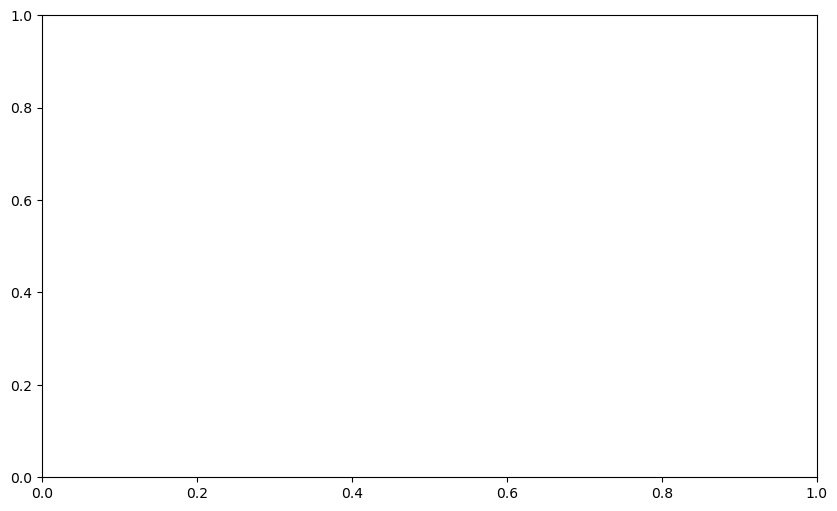

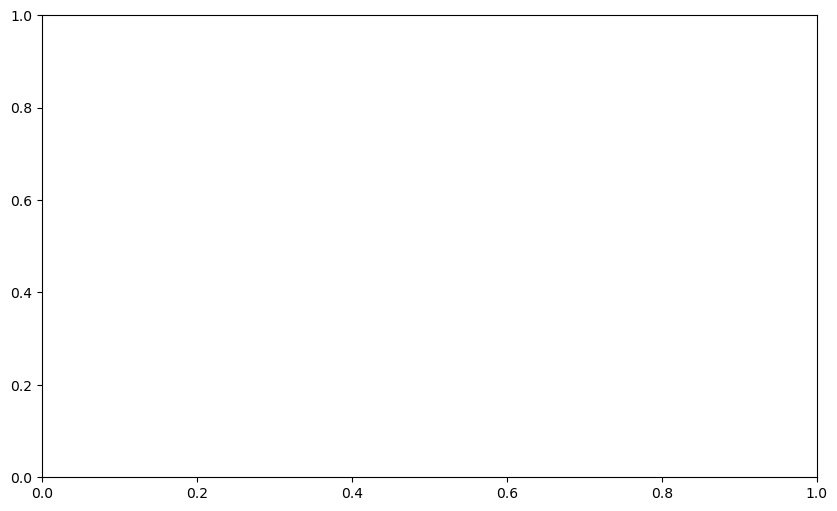

In [17]:
user.initiate_chat(agent, message="What if all warehouse costs were 13% more expensive")

user (to OptiGuide Energy Arbitrage Example):

What if our warehouses needed to install an additional 15 feet of cooling towers per warehouse

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to writer):


Answer Code:


--------------------------------------------------------------------------------
writer (to OptiGuide Energy Arbitrage Example):

```python
for w in parameters['warehouse_data']:
    w['area'] -= 15
```

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to safeguard):


--- Code ---
for w in parameters['warehouse_data']:
    w['area'] -= 15

--- One-Word Answer: SAFE or DANGER ---


--------------------------------------------------------------------------------
[flaml.autogen.oai.completion: 12-08 12:19:29] {236} INFO - retrying in 10 seconds...
Traceback (most recent call last):
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python

       0    7.4225285e+05   3.157220e+04   0.000000e+00      0s
       6    2.4576635e+04   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.457663529e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231107, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xd327d0f5
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 4e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Pr


CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x3acd860e
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 4e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.8341659e+05   3.157220e+04   0.000000e+00      0s
       5    1.9362141e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.936214118e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231115, Generator: ADK HUDSON___FALLS

Model fingerprint: 0x77819a03
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 4e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.3759971e+05   3.157220e+04   0.000000e+00      0s
       4    1.3071741e+04   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.307174118e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231122, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercia

Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2017449e+06   3.157220e+04   0.000000e+00      0s
       5    3.7805302e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds (0.00 work units)
Optimal objective  3.780530214e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231129, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x8b9ead51
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [4e+01, 1e+02]
  Bounds range     [

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.824917647e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231206, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xed98a194
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 4e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.30900

[flaml.autogen.oai.completion: 12-08 12:20:20] {236} INFO - retrying in 10 seconds...
Traceback (most recent call last):
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/flaml/autogen/oai/completion.py", line 206, in _get_response
    response = openai_completion.create(**config)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/chat_completion.py", line 25, in create
    return super().create(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/abstract/engine_api_resource.py", line 155, in create
    response, _, api_key = requestor.request(
                           ^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_requestor.py", line 299, in request
    resp, got_stream = self._interpret_response(result, s


CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x504ca31a
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 4e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.4225285e+05   3.157220e+04   0.000000e+00      0s
       6    2.4576635e+04   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.457663529e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231107, Generator: ADK HUDSON___FALLS

Model fingerprint: 0x3a2342a3
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 4e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.9337632e+05   3.157220e+04   0.000000e+00      0s
       4    1.6404000e+04   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.640400000e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231114, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercia

Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.4973155e+05   3.157220e+04   0.000000e+00      0s
       5    2.2108024e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.210802353e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231121, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x77819a03
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [

Solved in 3 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.952047059e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231128, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x0d4322e1
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 4e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.20174

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xc1e1408f
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 4e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.6628032e+05   3.157220e+04   0.000000e+00      0s
       5    1.8249176e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.824917647e+04


----------------------------------------------------------------------
...Price data alread

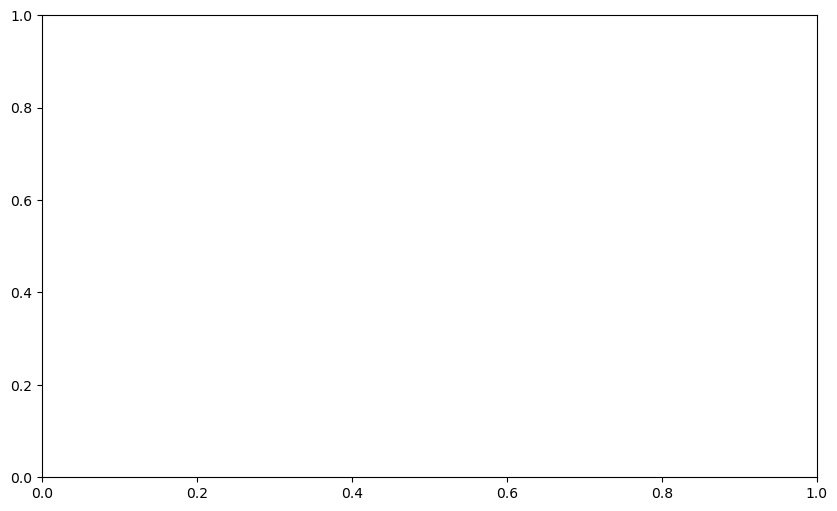

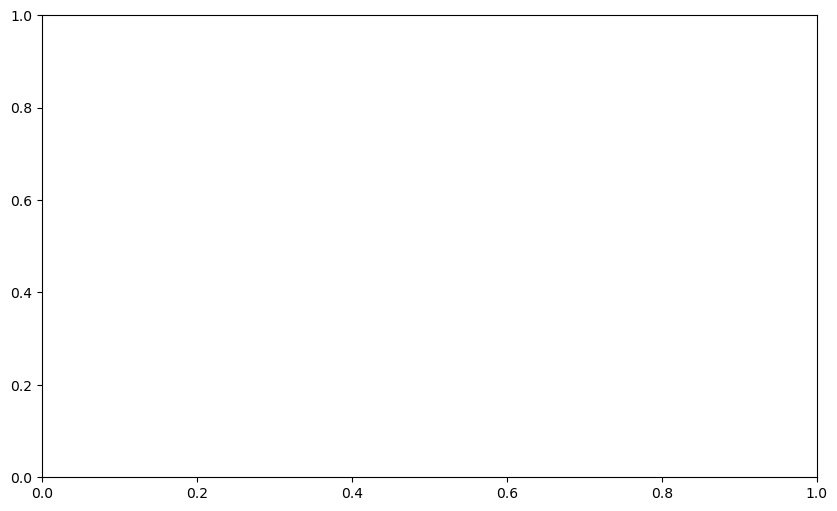

In [22]:
user.initiate_chat(agent, message="What if our warehouses needed to install an additional 15 feet of cooling towers per warehouse")

user (to OptiGuide Energy Arbitrage Example):

What if we switch our generator from ADK HUDSON___FALLS to ADK S GLENS___FALLS?

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to writer):


Answer Code:


--------------------------------------------------------------------------------
writer (to OptiGuide Energy Arbitrage Example):

```python
parameters['generator_name'] = 'ADK S GLENS___FALLS'
```

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to safeguard):


--- Code ---
parameters['generator_name'] = 'ADK S GLENS___FALLS'

--- One-Word Answer: SAFE or DANGER ---


--------------------------------------------------------------------------------
[flaml.autogen.oai.completion: 12-08 12:46:49] {236} INFO - retrying in 10 seconds...
Traceback (most recent call last):
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/flaml/au

Thread count was 12 (of 12 available processors)

Solution count 3: 246713 234494 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.467131709447e+05, best bound 2.467131709447e+05, gap 0.0000%


----------------------------------------------------------------------
...Price data already downloaded for date: 20231106, Generator: ADK S GLENS___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x58d19c6d
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 

       3    1.1482141e+04   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.148214118e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231113
Saving price data for date: 20231113, Generator: ADK S GLENS___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x6ca422bc
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 colu

       5    6.9472941e+03   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  6.947294118e+03


----------------------------------------------------------------------
...Price data already downloaded for date: 20231120
Saving price data for date: 20231120, Generator: ADK S GLENS___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x4d3bf8ac
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 colu

       3    1.1034965e+04   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.103496471e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231127
Saving price data for date: 20231127, Generator: ADK S GLENS___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x3f9ec841
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 colu

       3    1.6773647e+03   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.677364706e+03


----------------------------------------------------------------------
...Price data already downloaded for date: 20231204
Saving price data for date: 20231204, Generator: ADK S GLENS___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xe256bbde
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+01, 6e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 colu

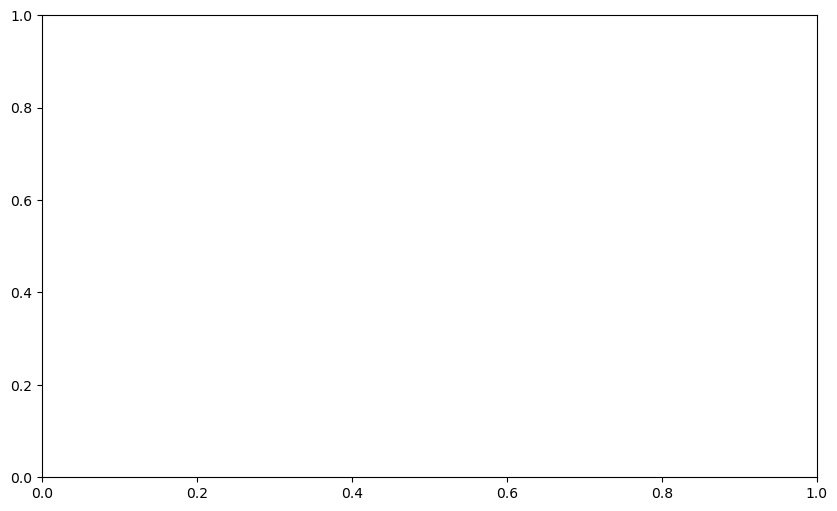

In [23]:
user.initiate_chat(agent, message="What if we switch our generator from ADK HUDSON___FALLS to ADK S GLENS___FALLS?")

user (to OptiGuide Energy Arbitrage Example):

What if the battery charge capacity for Palladium was only 25% instead of 50%?

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to writer):


Answer Code:


--------------------------------------------------------------------------------
writer (to OptiGuide Energy Arbitrage Example):

```python
parameters['battery_types']['palladium']['charge_loss'] = 0.25
```

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to safeguard):


--- Code ---
parameters['battery_types']['palladium']['charge_loss'] = 0.25

--- One-Word Answer: SAFE or DANGER ---


--------------------------------------------------------------------------------
[flaml.autogen.oai.completion: 12-08 12:55:00] {236} INFO - retrying in 10 seconds...
Traceback (most recent call last):
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/sit


Solved in 9 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.500938431e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231107, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x87aae05b
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [2e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+01, 2e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 111 columns, 1077 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1454


CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xe71cfa6b
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+01, 2e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 111 columns, 1077 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.9644741e+05   1.023798e+04   0.000000e+00      0s
       9    2.0092004e+04   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.009200392e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231115, Generator: ADK HUDSON___FALLS

Model fingerprint: 0xe49ecd16
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+01, 2e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 111 columns, 1077 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.1487722e+05   1.023798e+04   0.000000e+00      0s
       8    1.6360271e+04   0.000000e+00   0.000000e+00      0s

Solved in 8 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.636027059e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231122, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercia

Presolved: 44 rows, 111 columns, 1077 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0490647e+05   1.023798e+04   0.000000e+00      0s
       9    4.1527631e+04   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.00 seconds (0.00 work units)
Optimal objective  4.152763137e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231129, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xc360ab57
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [4e+01, 1e+02]
  Bounds range     [

Solved in 8 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.055552157e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231206, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xf1e6fd87
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+01, 2e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 111 columns, 1077 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.41989

[flaml.autogen.oai.completion: 12-08 12:56:00] {236} INFO - retrying in 10 seconds...
Traceback (most recent call last):
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/flaml/autogen/oai/completion.py", line 206, in _get_response
    response = openai_completion.create(**config)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/chat_completion.py", line 25, in create
    return super().create(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/abstract/engine_api_resource.py", line 155, in create
    response, _, api_key = requestor.request(
                           ^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_requestor.py", line 299, in request
    resp, got_stream = self._interpret_response(result, s

       9    4.4586667e+05   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.00 seconds (0.00 work units)
Optimal objective  4.458666667e+05


----------------------------------------------------------------------
...Price data already downloaded for date: 20231108, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x14c45a32
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [2e+01, 6e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+04, 2e+04]
Presolve removed 269 rows and 99 columns
Presolve time: 0.00s
Presolved: 22 rows, 67 columns, 550 nonzeros

Iteration    Objecti

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x9e816820
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [3e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+04, 2e+04]
Presolve removed 269 rows and 99 columns
Presolve time: 0.00s
Presolved: 22 rows, 67 columns, 550 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6107600e+07   6.325000e+05   0.000000e+00      0s
      10    6.1360000e+05   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.00 seconds (0.00 work units)
Optimal objective  6.136000000e+05


----------------------------------------------------------------------
...Price data already

Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xfd32f7d2
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [3e+01, 4e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+04, 2e+04]
Presolve removed 269 rows and 99 columns
Presolve time: 0.00s
Presolved: 22 rows, 67 columns, 550 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4864000e+07   6.325000e+05   0.000000e+00      0s
       7    1.2173333e+05   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.217333333e+05


----------------------------------------------------------------------
...Price data already downloaded for date: 20231123, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up

Presolve time: 0.00s
Presolved: 22 rows, 67 columns, 550 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.9449200e+07   6.325000e+05   0.000000e+00      0s
      11    1.3408000e+06   0.000000e+00   0.000000e+00      0s

Solved in 11 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.340800000e+06


----------------------------------------------------------------------
...Price data already downloaded for date: 20231130, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xefe1a23d
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [4e+01, 8e+01]



Solved in 10 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.526933333e+06
[840800.0, 445866.6666666665, 662000.0, 541333.3333333333, 342800.0, 231200.0, 388866.6666666666, 776600.0, 992533.3333333333, 613600.0, 471133.33333333326, 436600.0000000001, 366533.3333333334, 327266.6666666666, 957466.6666666665, 765600.0, 121733.33333333337, 399533.33333333326, 360933.33333333326, 380133.33333333326, 445733.33333333326, 710866.6666666665, 1177600.0, 1340800.0000000002, 967866.6666666667, 113200.0, 127866.66666666663, 141266.66666666663, 477933.33333333326, 669200.0, 1526933.3333333333]
{'lithium': 0.0, 'lead': 0.0, 'palladium': 4000.0}
shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (745,) and arg 1 with shape (0,).
OptiGuide Energy Arbitrage Example (to user):

Sorry. I cannot answer your question.

--------------------------------------------------------------------------------


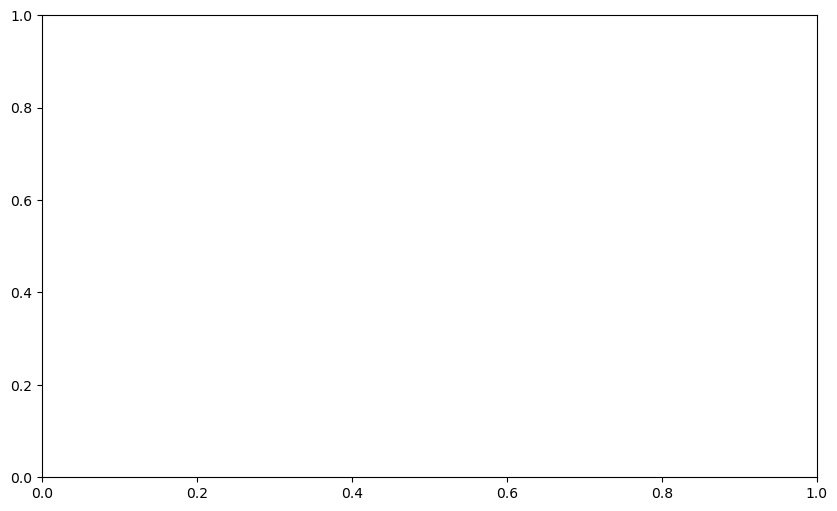

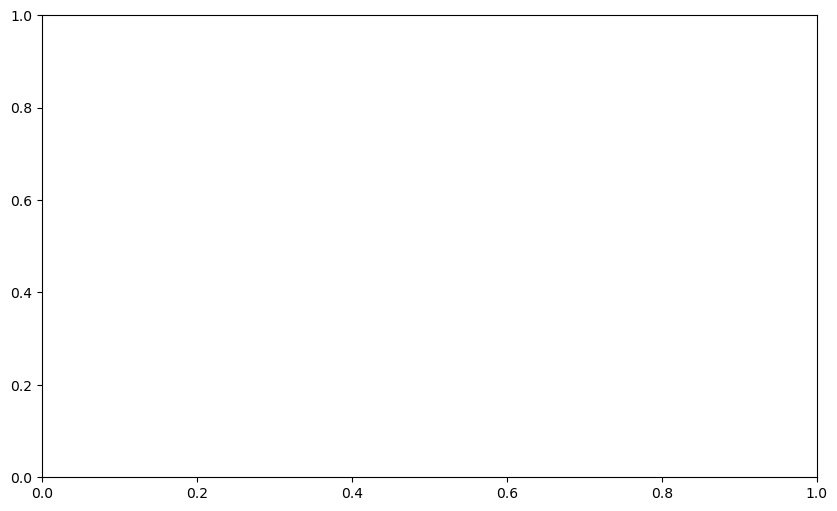

In [24]:
user.initiate_chat(agent, message="What if the battery charge capacity for Palladium was only 25% instead of 50%?")

user (to OptiGuide Energy Arbitrage Example):

What if we were to add an additional 5 square square feet of space for every battery type to install a fan? 

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to writer):


Answer Code:


--------------------------------------------------------------------------------
writer (to OptiGuide Energy Arbitrage Example):

```python
for battery in parameters['battery_types']:
    parameters['battery_types'][battery]['size'] += 5
```

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to safeguard):


--- Code ---
for battery in parameters['battery_types']:
    parameters['battery_types'][battery]['size'] += 5

--- One-Word Answer: SAFE or DANGER ---


--------------------------------------------------------------------------------
[flaml.autogen.oai.completion: 12-08 13:08:01] {236} INFO - retrying in 10 seconds...


Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xa1592c7d
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 4e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.1874417e+05   1.304962e+04   0.000000e+00      0s
       5    2.2528582e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.252858235e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231107, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[

  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 4e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8280352e+05   1.304962e+04   0.000000e+00      0s
       5    1.5037000e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.503700000e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231114, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 colu

       0    4.0758376e+05   1.304962e+04   0.000000e+00      0s
       5    2.0265688e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.026568824e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231121, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x50cfc293
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 4e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Pr


CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xd0cd3112
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 4e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.1693070e+05   1.304962e+04   0.000000e+00      0s
       5    3.4266108e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  3.426610802e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231129, Generator: ADK HUDSON___FALLS

Model fingerprint: 0x5874cdd1
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 4e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.1482904e+05   1.304962e+04   0.000000e+00      0s
       5    1.6728412e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.672841176e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231206, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercia

[flaml.autogen.oai.completion: 12-08 13:08:54] {236} INFO - retrying in 10 seconds...
Traceback (most recent call last):
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/flaml/autogen/oai/completion.py", line 206, in _get_response
    response = openai_completion.create(**config)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/chat_completion.py", line 25, in create
    return super().create(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/abstract/engine_api_resource.py", line 155, in create
    response, _, api_key = requestor.request(
                           ^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_requestor.py", line 299, in request
    resp, got_stream = self._interpret_response(result, s


CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x58d19c6d
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5592540e+05   4.078736e+04   0.000000e+00      0s
       6    2.8672741e+04   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.867274118e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231107, Generator: ADK HUDSON___FALLS

Model fingerprint: 0x6ca422bc
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1507611e+06   4.078736e+04   0.000000e+00      0s
       5    1.9138000e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.913800000e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231114, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercia

Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2231951e+06   4.078736e+04   0.000000e+00      0s
       5    2.5792694e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.579269412e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231121, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x2393e877
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [

Solved in 3 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.277388235e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231128, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xb23a8255
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.54747

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x2b3c07dd
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2444733e+06   4.078736e+04   0.000000e+00      0s
       5    2.1290706e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.129070588e+04


----------------------------------------------------------------------
...Price data alread

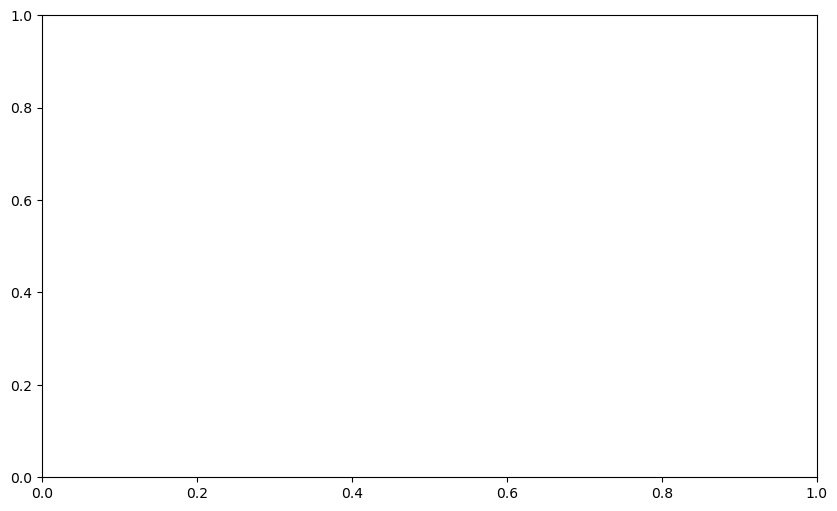

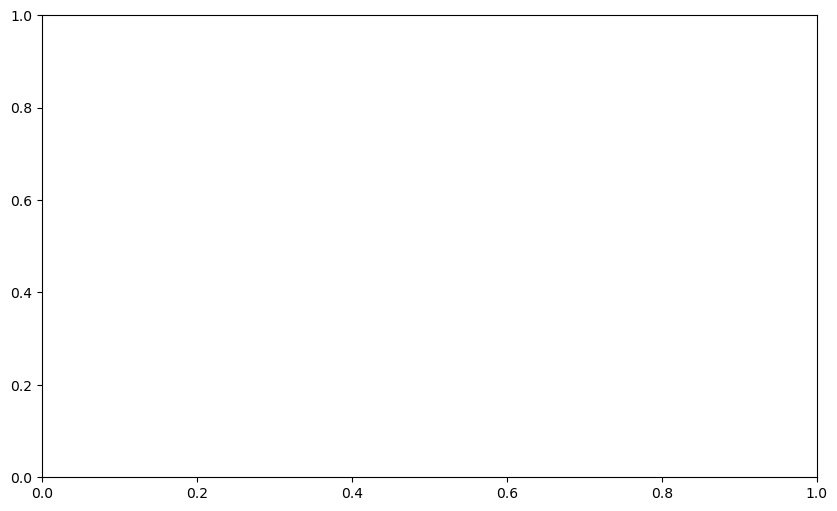

In [25]:
user.initiate_chat(agent, message="What if we were to add an additional 5 square square feet of space for every battery type to install a fan? ")

In [36]:
user.initiate_chat(agent, message="What if we had a minimum charge of 25% at all periods?")

user (to OptiGuide Energy Arbitrage Example):

What if we had a minimum charge of 25% at all periods?

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to writer):


Answer Code:


--------------------------------------------------------------------------------
writer (to OptiGuide Energy Arbitrage Example):

```python
min_charge_pct = 25
for p in range(num_periods):
    model.addConstr(gp.quicksum(charge_loss * buy[p_] - sell[p_] for p_ in range(p+1)) >= min_charge_pct/100 * capacity, f'MinChargeConstraint_period_{p+1}')
```

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to safeguard):


--- Code ---
min_charge_pct = 25
for p in range(num_periods):
    model.addConstr(gp.quicksum(charge_loss * buy[p_] - sell[p_] for p_ in range(p+1)) >= min_charge_pct/100 * capacity, f'MinChargeConstraint_period_{p+1}')

--- One-Word Answer: SAFE or DANGER ---


--

  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5592540e+05   4.078736e+04   0.000000e+00      0s
       6    2.8672741e+04   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.867274118e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231107, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model finger

       0    1.1507611e+06   4.078736e+04   0.000000e+00      0s
       5    1.9138000e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.913800000e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231114, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x00f0bfdd
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Pr


CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x2393e877
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2076826e+06   4.078736e+04   0.000000e+00      0s
       4    1.5250365e+04   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.525036471e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231122, Generator: ADK HUDSON___FALLS

Model fingerprint: 0xb23a8255
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5474757e+06   4.078736e+04   0.000000e+00      0s
       5    4.4202890e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.420289037e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231129, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercia

Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2444733e+06   4.078736e+04   0.000000e+00      0s
       5    2.1290706e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.129070588e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231206, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x157b4994
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [

[flaml.autogen.oai.completion: 12-08 14:19:38] {236} INFO - retrying in 10 seconds...
Traceback (most recent call last):
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/flaml/autogen/oai/completion.py", line 206, in _get_response
    response = openai_completion.create(**config)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/chat_completion.py", line 25, in create
    return super().create(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/abstract/engine_api_resource.py", line 155, in create
    response, _, api_key = requestor.request(
                           ^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_requestor.py", line 299, in request
    resp, got_stream = self._interpret_response(result, s

  Objective range  [2e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.2324717e+05   4.078736e+04   0.000000e+00      0s
       6    9.2158706e+03   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  9.215870588e+03


----------------------------------------------------------------------
...Price data already downloaded for date: 20231108, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 colu

       0    1.1379652e+06   4.078736e+04   0.000000e+00      0s
       6    2.2589165e+04   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.258916471e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231115, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x355096b3
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Pr


CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x30ea0fd2
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 4e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.8313282e+05   4.078736e+04   0.000000e+00      0s
       5    6.4951765e+02   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  6.495176471e+02


----------------------------------------------------------------------
...Price data already downloaded for date: 20231123, Generator: ADK HUDSON___FALLS

Model fingerprint: 0xc4f26d37
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [4e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9589031e+06   4.078736e+04   0.000000e+00      0s
       4    5.0855329e+04   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.00 seconds (0.00 work units)
Optimal objective  5.085532941e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231130, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercia

Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6852696e+06   4.078736e+04   0.000000e+00      0s
       7    1.0197124e+05   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.019712360e+05
[28672.741176470598, 9215.870588235295, 14732.694117647066, 13551.094117647062, 7873.6, 4492.435294117644, 11482.141176470595, 19138.0, 22589.16470588236, 11476.952941176469, 8923.682352941169, 6817.341176470596, 8318.388235294122, 6947.2941176470595, 25792.694117647086, 15250.364705882355, 649.5176470588267, 12320.576470588236, 8652.658823529411, 9269.399999999998, 11034.964705882347, 22773.882352941182, 44202.890374331524, 50855.32941176471, 20218.38823529411, 330.64705882353155, 1353.0588235294126, 1677.3647058823517, 11745.83529411765, 21290.705882352937, 101971.2360071301]
{'lithium': 0.0, 'lead': 14.0, 'palladium': 158.0}
'm'
OptiGuide Energy Arbitrage

In [37]:
user.initiate_chat(agent, message = 'What if our procurment team told us we had to have a minimum of 20 batteries and a maximum of 50 batteries?')

user (to OptiGuide Energy Arbitrage Example):

What if our procurment team told us we had to have a minimum of 20 batteries and a maximum of 50 batteries?

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to writer):


Answer Code:


--------------------------------------------------------------------------------
writer (to OptiGuide Energy Arbitrage Example):

```python
min_batteries = 20
max_batteries = 50
for battery_type in parameters['battery_types_used']:
    model.addConstr(decision_var_dict['battery_counts'][battery_type] >= min_batteries, f'MinBatteriesConstraint_{battery_type}') 
    model.addConstr(decision_var_dict['battery_counts'][battery_type] <= max_batteries, f'MaxBatteriesConstraint_{battery_type}')
```

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to safeguard):


--- Code ---
min_batteries = 20
max_batteries = 50
for battery_typ

       0    8.2324717e+05   4.078736e+04   0.000000e+00      0s
       6    9.2158706e+03   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  9.215870588e+03


----------------------------------------------------------------------
...Price data already downloaded for date: 20231108, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x592fd376
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+01, 6e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Pr


CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x355096b3
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0667489e+06   4.078736e+04   0.000000e+00      0s
       4    1.1476953e+04   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.147695294e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231116, Generator: ADK HUDSON___FALLS

Model fingerprint: 0x30ea0fd2
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 4e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.8313282e+05   4.078736e+04   0.000000e+00      0s
       5    6.4951765e+02   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  6.495176471e+02


----------------------------------------------------------------------
...Price data already downloaded for date: 20231123, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercia

Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9589031e+06   4.078736e+04   0.000000e+00      0s
       4    5.0855329e+04   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.085532941e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231130, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x20df41fb
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [4e+01, 8e+01]
  Bounds range     [

Solved in 7 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.019712360e+05
[28672.741176470598, 9215.870588235295, 14732.694117647066, 13551.094117647062, 7873.6, 4492.435294117644, 11482.141176470595, 19138.0, 22589.16470588236, 11476.952941176469, 8923.682352941169, 6817.341176470596, 8318.388235294122, 6947.2941176470595, 25792.694117647086, 15250.364705882355, 649.5176470588267, 12320.576470588236, 8652.658823529411, 9269.399999999998, 11034.964705882347, 22773.882352941182, 44202.890374331524, 50855.32941176471, 20218.38823529411, 330.64705882353155, 1353.0588235294126, 1677.3647058823517, 11745.83529411765, 21290.705882352937, 101971.2360071301]
{'lithium': 0.0, 'lead': 14.0, 'palladium': 158.0}
'm'
OptiGuide Energy Arbitrage Example (to writer):



While running the code you suggested, I encountered the <class 'KeyError'>:
--- ERROR MESSAGE ---
'm'

Please try to resolve this bug, and rewrite the code snippet.
--- NEW CODE ---


--------------------------------

[flaml.autogen.oai.completion: 12-08 14:33:59] {236} INFO - retrying in 10 seconds...
Traceback (most recent call last):
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/flaml/autogen/oai/completion.py", line 206, in _get_response
    response = openai_completion.create(**config)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/chat_completion.py", line 25, in create
    return super().create(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/abstract/engine_api_resource.py", line 155, in create
    response, _, api_key = requestor.request(
                           ^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_requestor.py", line 299, in request
    resp, got_stream = self._interpret_response(result, s

  Objective range  [2e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.2324717e+05   4.078736e+04   0.000000e+00      0s
       6    9.2158706e+03   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  9.215870588e+03


----------------------------------------------------------------------
...Price data already downloaded for date: 20231108, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 colu

       0    1.1379652e+06   4.078736e+04   0.000000e+00      0s
       6    2.2589165e+04   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.258916471e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231115, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x355096b3
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Pr

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x30ea0fd2
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 4e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.8313282e+05   4.078736e+04   0.000000e+00      0s
       5    6.4951765e+02   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  6.495176471e+02


----------------------------------------------------------------------
...Price data alread

Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xc4f26d37
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [4e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9589031e+06   4.078736e+04   0.000000e+00      0s
       4    5.0855329e+04   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.00 seconds (0.00 work units)
Optimal objective  5.085532941e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231130, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using 

Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6852696e+06   4.078736e+04   0.000000e+00      0s
       7    1.0197124e+05   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.019712360e+05
[28672.741176470598, 9215.870588235295, 14732.694117647066, 13551.094117647062, 7873.6, 4492.435294117644, 11482.141176470595, 19138.0, 22589.16470588236, 11476.952941176469, 8923.682352941169, 6817.341176470596, 8318.388235294122, 6947.2941176470595, 25792.694117647086, 15250.364705882355, 649.5176470588267, 12320.576470588236, 8652.658823529411, 9269.399999999998, 11034.964705882347, 22773.882352941182, 44202.890374331524, 50855.32941176471, 20218.38823529411, 330.64705882353155, 1353.0588235294126, 1677.3647058823517, 11745.83529411765, 21290.705882352937, 101971.2360071301]
{'lithium': 0.0, 'l

In [38]:
user.initiate_chat(agent, message = "What if every 10 periods, we can't sell electricity to the grid?")

user (to OptiGuide Energy Arbitrage Example):

What if every 10 periods, we can't sell electricity to the grid?

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to writer):


Answer Code:


--------------------------------------------------------------------------------
writer (to OptiGuide Energy Arbitrage Example):

```python
break_num = 10
for p in range(num_periods):
    if p%break_num == 0:
        model.addConstr(sell[p] = 0, f'DischargeConstraint_period_{p+1}')
```

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to safeguard):


--- Code ---
break_num = 10
for p in range(num_periods):
    if p%break_num == 0:
        model.addConstr(sell[p] = 0, f'DischargeConstraint_period_{p+1}')

--- One-Word Answer: SAFE or DANGER ---


--------------------------------------------------------------------------------
[flaml.autogen.oai.completion: 12-08 15

writer (to OptiGuide Energy Arbitrage Example):

```python
break_num = 10
for p in range(num_periods):
    if p%break_num == 0:
        model.addConstr(sell[p] == 0, f'DischargeConstraint_period_{p+1}')
```

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to safeguard):


--- Code ---
break_num = 10
for p in range(num_periods):
    if p%break_num == 0:
        model.addConstr(sell[p] == 0, f'DischargeConstraint_period_{p+1}')

--- One-Word Answer: SAFE or DANGER ---


--------------------------------------------------------------------------------
[flaml.autogen.oai.completion: 12-08 15:20:59] {236} INFO - retrying in 10 seconds...
Traceback (most recent call last):
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/flaml/autogen/oai/completion.py", line 206, in _get_response
    response = openai_completion.create(**config)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryans

     0     0 255632.972    0    1 234494.149 255632.972  9.01%     -    3s
H    0     0                    246713.17094 246713.171  0.00%     -    3s
     0     0          -    0      246713.171 246713.171  0.00%     -    3s

Cutting planes:
  Gomory: 2

Explored 1 nodes (1346 simplex iterations) in 3.63 seconds (7.89 work units)
Thread count was 12 (of 12 available processors)

Solution count 3: 246713 234494 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.467131709447e+05, best bound 2.467131709447e+05, gap 0.0000%


----------------------------------------------------------------------
...Price data already downloaded for date: 20231106, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.e


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.3383949e+05   4.078736e+04   0.000000e+00      0s
       3    1.1482141e+04   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.148214118e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231113, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x6ca422bc
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]

Optimal objective  6.947294118e+03


----------------------------------------------------------------------
...Price data already downloaded for date: 20231120, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x4d3bf8ac
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2231951e+06   4.078736e+04   0.000000e+00      0s
       5    2

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x3f9ec841
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4361463e+06   4.078736e+04   0.000000e+00      0s
       3    2.2773882e+04   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.277388235e+04


----------------------------------------------------------------------
...Price data alread

Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xe256bbde
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+01, 6e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0670861e+06   4.078736e+04   0.000000e+00      0s
       4    1.1745835e+04   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.174583529e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231205, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using 

In [39]:
user.initiate_chat(agent, message = "What if our procurment team told us we had to have a minimum of 5 batteries but doing so would get us a bulk discount of 20%? ")

user (to OptiGuide Energy Arbitrage Example):

What if our procurment team told us we had to have a minimum of 5 but doing so would get us a bulk discount of 20%? 

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to writer):


Answer Code:


--------------------------------------------------------------------------------
writer (to OptiGuide Energy Arbitrage Example):

```python
discount = 20
parameters['battery_type']['cost'] *= (100-discount)/100
model.addConstraint(decision_var_dict['battery_counts'] >= 5, f'MinBatteriesConstraint') 
```

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to safeguard):


--- Code ---
discount = 20
parameters['battery_type']['cost'] *= (100-discount)/100
model.addConstraint(decision_var_dict['battery_counts'] >= 5, f'MinBatteriesConstraint') 

--- One-Word Answer: SAFE or DANGER ---


--------------------------------

  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5592540e+05   4.078736e+04   0.000000e+00      0s
       6    2.8672741e+04   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.867274118e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231107, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x436df15f
Coefficient stat

       5    1.9138000e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.913800000e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231114, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x00f0bfdd
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objec


CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x2393e877
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2076826e+06   4.078736e+04   0.000000e+00      0s
       4    1.5250365e+04   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.525036471e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231122, Generator: ADK HUDSON___FALLS

Model fingerprint: 0xb23a8255
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5474757e+06   4.078736e+04   0.000000e+00      0s
       5    4.4202890e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  4.420289037e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231129, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercia

Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2444733e+06   4.078736e+04   0.000000e+00      0s
       5    2.1290706e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.129070588e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231206, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x157b4994
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [

[flaml.autogen.oai.completion: 12-08 15:37:07] {236} INFO - retrying in 10 seconds...
Traceback (most recent call last):
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/flaml/autogen/oai/completion.py", line 206, in _get_response
    response = openai_completion.create(**config)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/chat_completion.py", line 25, in create
    return super().create(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/abstract/engine_api_resource.py", line 155, in create
    response, _, api_key = requestor.request(
                           ^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_requestor.py", line 299, in request
    resp, got_stream = self._interpret_response(result, s


CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x58d19c6d
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5592540e+05   4.078736e+04   0.000000e+00      0s
       6    2.8672741e+04   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.867274118e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231107, Generator: ADK HUDSON___FALLS

Model fingerprint: 0x6ca422bc
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1507611e+06   4.078736e+04   0.000000e+00      0s
       5    1.9138000e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.913800000e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231114, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercia

Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2231951e+06   4.078736e+04   0.000000e+00      0s
       5    2.5792694e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.579269412e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231121, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x2393e877
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [

Solved in 3 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.277388235e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231128, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xb23a8255
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.01s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.54747

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x2b3c07dd
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2444733e+06   4.078736e+04   0.000000e+00      0s
       5    2.1290706e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.129070588e+04


----------------------------------------------------------------------
...Price data alread

In [41]:
user.initiate_chat(agent, message ="""What if you added a vanadium flow battery and knew the specs as follows:
size = 15
capacity = 200
charge loss = 80%
max charge = 140
max_discharge = 140
cost = 550
Answer Code:
```python
parameters['battery_type']['vanadium'] = {
'size': 15,
'capacity': 200,
'charge_loss': 0.8,
'max_charge': 140,
'max_discharge': 140,
'cost': 550
}
parameters['battery_types_used'].append('vanadium')""")

user (to OptiGuide Energy Arbitrage Example):

What if you added a vanadium flow battery and knew the specs as follows:
size = 15
capacity = 200
charge loss = 80%
max charge = 140
max_discharge = 140
cost = 550
Answer Code:
```python
parameters['battery_type']['vanadium'] = {
'size': 15,
'capacity': 200,
'charge_loss': 0.8,
'max_charge': 140,
'max_discharge': 140,
'cost': 550
}
parameters['battery_types_used'].append('vanadium')

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to writer):


Answer Code:


--------------------------------------------------------------------------------
writer (to OptiGuide Energy Arbitrage Example):

```python
parameters['battery_type']['vanadium'] = {
'size': 15,
'capacity': 200,
'charge_loss': 0.8,
'max_charge': 140,
'max_discharge': 140,
'cost': 550
}
parameters['battery_types_used'].append('vanadium')
```

----------------------------------------------------------------------------

writer (to OptiGuide Energy Arbitrage Example):

It seems there was a slight mistake in the parameter name we were trying to access. The name should be 'battery_types' instead of 'battery_type'. Please see the corrected answer code:

```python
parameters['battery_types']['vanadium'] = {
'size': 15,
'capacity': 200,
'charge_loss': 0.8,
'max_charge': 140,
'max_discharge': 140,
'cost': 550
}
parameters['battery_types_used'].append('vanadium')
```

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to safeguard):


--- Code ---
parameters['battery_types']['vanadium'] = {
'size': 15,
'capacity': 200,
'charge_loss': 0.8,
'max_charge': 140,
'max_discharge': 140,
'cost': 550
}
parameters['battery_types_used'].append('vanadium')

--- One-Word Answer: SAFE or DANGER ---


--------------------------------------------------------------------------------
[flaml.autogen.oai.completion: 12-08 17:14:25] {236} INFO - retrying in 10 secon


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 4610952.00    0    1   -0.00000 4610952.00      -     -    4s
     0     0 4513678.20    0    1   -0.00000 4513678.20      -     -    4s
H    0     0                    4483678.2000 4513678.20  0.67%     -    4s
*    0     0               0    4491430.1697 4491430.17 -0.00%     -    4s

Explored 1 nodes (1334 simplex iterations) in 4.82 seconds (9.35 work units)
Thread count was 12 (of 12 available processors)

Solution count 3: 4.49143e+06 4.48368e+06 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.491430169697e+06, best bound 4.491430169697e+06, gap 0.0000%


----------------------------------------------------------------------
...Price data already downloaded for date: 20231106, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2

  Objective range  [3e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+02, 5e+03]
Presolve removed 344 rows and 102 columns
Presolve time: 0.00s
Presolved: 44 rows, 134 columns, 1100 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.9261106e+06   1.309275e+05   0.000000e+00      0s
       9    1.0028720e+05   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.002872000e+05


----------------------------------------------------------------------
...Price data already downloaded for date: 20231113, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 388 rows, 192 col

       0    3.2213754e+06   1.309275e+05   0.000000e+00      0s
       4    8.4988800e+04   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.00 seconds (0.00 work units)
Optimal objective  8.498880000e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231120, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 388 rows, 192 columns and 5000 nonzeros
Model fingerprint: 0x27961ed1
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+02, 5e+03]
Presolve removed 344 rows and 102 columns
Presolve time: 0.00s
P



----------------------------------------------------------------------
...Price data already downloaded for date: 20231127, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 388 rows, 192 columns and 5000 nonzeros
Model fingerprint: 0x0681d8f9
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+02, 5e+03]
Presolve removed 344 rows and 102 columns
Presolve time: 0.00s
Presolved: 44 rows, 134 columns, 1100 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.4802666e+06   1.309275e+05   0.000000e+00      0s
      11    1.9875050e+05   0.000000e+00   0.00

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 388 rows, 192 columns and 5000 nonzeros
Model fingerprint: 0x5dc84365
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+01, 6e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+02, 5e+03]
Presolve removed 344 rows and 102 columns
Presolve time: 0.01s
Presolved: 44 rows, 134 columns, 1100 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3265728e+06   1.309275e+05   0.000000e+00      0s
      10    1.2079990e+05   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.207999000e+05


----------------------------------------------------------------------
...Price data alre

In [42]:
user.initiate_chat(agent, message = 'What if we were looking to maximize our profits exclusively in the last 10 days of the month?')

user (to OptiGuide Energy Arbitrage Example):

What if we were looking to maximize our profits exclusively in the last 10 days of the month?

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to writer):


Answer Code:


--------------------------------------------------------------------------------
writer (to OptiGuide Energy Arbitrage Example):

```python
model.setObjective(
        gp.quicksum(prices[p] * sell[p] - prices[p] * buy[p] for p in periods if p >= num_periods - 10),
        GRB.MAXIMIZE
    )
```

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to safeguard):


--- Code ---
model.setObjective(
        gp.quicksum(prices[p] * sell[p] - prices[p] * buy[p] for p in periods if p >= num_periods - 10),
        GRB.MAXIMIZE
    )

--- One-Word Answer: SAFE or DANGER ---


-------------------------------------------------------------------------

writer (to OptiGuide Energy Arbitrage Example):

I apologize for the confusion. In the context of your project, the line that sets the objective function might be better placed inside the `create_model()` function. This is where the model is being defined and the decision variables are being added to the model. Here is the corrected code snippet:

```python
# Inside create_model() function
    ...

    # Update: constrain the objective function to the last 10 periods
    model.setObjective(
        gp.quicksum(prices[p] * sell[p] - prices[p] * buy[p] for p in periods if p >= num_periods - 10),
        GRB.MAXIMIZE
    )

    return [model, decision_var_dict, constraint_params]
```

Note that you might need to adjust the indices to ensure that the objective function is correctly constrained to the last 10 periods. As Python uses 0-based indexes, if `num_periods` is 30 for example, the last 10 periods would be 20 through 29 inclusive.

----------------------------------------------------

In [44]:
user.initiate_chat(agent, message = """What if you added a vanadium flow battery and knew the specs as follows:
size = 15
capacity = 200
charge loss = 80%
max charge = 140
max_discharge = 140
cost = 550
Answer Code:
```python
parameters['battery_type']['vanadium'] = {
'size': 15,
'capacity': 200,
'charge_loss': 0.8,
'max_charge': 140,
'max_discharge': 140,
'cost': 550

Then, what if you need to buy a minimum of 20 vanadium flow batteries?
}""")

user (to OptiGuide Energy Arbitrage Example):

What if you added a vanadium flow battery and knew the specs as follows:
size = 15
capacity = 200
charge loss = 80%
max charge = 140
max_discharge = 140
cost = 550
Answer Code:
```python
parameters['battery_type']['vanadium'] = {
'size': 15,
'capacity': 200,
'charge_loss': 0.8,
'max_charge': 140,
'max_discharge': 140,
'cost': 550

Then, what if you need to buy a minimum of 20 vanadium flow batteries?
}

--------------------------------------------------------------------------------
OptiGuide Energy Arbitrage Example (to writer):


Answer Code:


--------------------------------------------------------------------------------
writer (to OptiGuide Energy Arbitrage Example):

```python
# Adding the specifications of the vanadium battery to the battery_types dictionary in the parameters
parameters['battery_type']['vanadium'] = {
    'size': 15,
    'capacity': 200,
    'charge_loss': 0.8,
    'max_charge': 140,
    'max_discharge': 140,
    '


CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x436df15f
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.2324717e+05   4.078736e+04   0.000000e+00      0s
       6    9.2158706e+03   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  9.215870588e+03


----------------------------------------------------------------------
...Price data already downloaded for date: 20231108, Generator: ADK HUDSON___FALLS

Model fingerprint: 0x00f0bfdd
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1379652e+06   4.078736e+04   0.000000e+00      0s
       6    2.2589165e+04   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.258916471e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231115, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercia

Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2076826e+06   4.078736e+04   0.000000e+00      0s
       4    1.5250365e+04   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.525036471e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231122, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x30ea0fd2
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 4e+01]
  Bounds range     [

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  4.420289037e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231129, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xc4f26d37
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [4e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.95890


CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x157b4994
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6852696e+06   4.078736e+04   0.000000e+00      0s
       7    1.0197124e+05   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.019712360e+05
[28672.741176470598, 9215.870588235295, 14732.694117647066, 13551.094117647062, 7873.6, 4492.435294117644, 11482.141176470595, 19138.0, 22589.16470588236, 


--------------------------------------------------------------------------------
[flaml.autogen.oai.completion: 12-08 17:33:50] {236} INFO - retrying in 10 seconds...
Traceback (most recent call last):
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/flaml/autogen/oai/completion.py", line 206, in _get_response
    response = openai_completion.create(**config)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/chat_completion.py", line 25, in create
    return super().create(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_resources/abstract/engine_api_resource.py", line 155, in create
    response, _, api_key = requestor.request(
                           ^^^^^^^^^^^^^^^^^^
  File "/Users/ryanshen/Desktop/opt/anaconda3/lib/python3.11/site-packages/openai/api_requestor.p



----------------------------------------------------------------------
...Price data already downloaded for date: 20231106, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x58d19c6d
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5592540e+05   4.078736e+04   0.000000e+00      0s
       6    2.8672741e+04   0.000000e+00   0.000


CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x6ca422bc
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1507611e+06   4.078736e+04   0.000000e+00      0s
       5    1.9138000e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.913800000e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231114, Generator: ADK HUDSON___FALLS

Model fingerprint: 0x4d3bf8ac
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2231951e+06   4.078736e+04   0.000000e+00      0s
       5    2.5792694e+04   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.579269412e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231121, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercia

Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4361463e+06   4.078736e+04   0.000000e+00      0s
       3    2.2773882e+04   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.277388235e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231128, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0xb23a8255
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [

Solved in 4 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.174583529e+04


----------------------------------------------------------------------
...Price data already downloaded for date: 20231205, Generator: ADK HUDSON___FALLS

 -- Price data downloaded successfully! -- 


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450716 - for non-commercial use only - registered to ry___@andrew.cmu.edu
Optimize a model with 291 rows, 144 columns and 3750 nonzeros
Model fingerprint: 0x2b3c07dd
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 5e+03]
Presolve removed 247 rows and 54 columns
Presolve time: 0.00s
Presolved: 44 rows, 112 columns, 1078 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.24447